![](https://www.gstatic.com/devrel-devsite/v2355ed73ae6b243a36832e70498f2cd0b3f352ff30481ebdfdc56826b566bf8a/tensorflow/images/lockup.svg)

До сегодняшнего дня мы собирали различные довольно простые модели в высокоуровневом API для [tensorflow](https://www.tensorflow.org/) под названием Keras. Сегодня, наконец, пришло время поиграться с голым ~~королём~~ функционалом библиотеки и посмотреть, как в нём собираются и обучаются самые простые модели. 

In [3]:
import numpy as np

In [4]:
import tensorflow as tf
tf.__version__  # ОУУУУ ЩИИИИТ, ВТОРАЯ ВЕРСИЯ!!! АААААААААААА

'2.1.0'

# 0. Tensoflow teaser

Давайте реализуем на `numpy` и на `tensorflow` функцию для поиска суммы квадратов первых $N$ чисел и посмотрим насколько быстро эти функции работают.

In [5]:
def np_sum_squares(N):
    return np.sum(np.arange(N)**2)

In [6]:
%%timeit
N = 10**8
np_sum_squares(N)

479 ms ± 48.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Tensorflow из-за того, что мы сначала задаём структуру вычислений, а после осуществляем их. Работает медленнее, чем numpy.

In [7]:
def tf_sum_squares(N):
    N = tf.constant(N, dtype='int64')
    return tf.reduce_sum((tf.range(N)**2))

In [8]:
%%timeit
N = 10**8
tf_sum_squares(N)

624 ms ± 64.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
N=10
tf.constant(N, dtype='int64')

<tf.Tensor: shape=(), dtype=int64, numpy=10>

Более того, когда вы уже задали свой граф вычислений и убедились, что всё работает, можно вызвать декоратор `tf.function`. [Он сделает работу заданного графа](https://www.tensorflow.org/tutorials/customization/performance) более оптимальной и ещё ускорит код. 

In [9]:
@tf.function
def tf_sum_squares(N):
    N = tf.constant(N, dtype='int64')
    return tf.reduce_sum((tf.range(N)**2))

In [10]:
%%timeit
N = 10**8
tf_sum_squares(N)

218 ms ± 3.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
import tensorflow as tf

Если сравнивать время, то мы видим значительный прогресс в скорости вычислений даже для простой задачи. Данный прирост будет значительно большим для сложных и тяжелых по памяти рассчетов.

# 1. Тензоры и базовые операции над ними

Основной объект в tensorflow - это **тензор.** Или многомерный массив чисел. Чтобы не нужно было учить кучу новых команд, tensorflow косплеит numpy. 

```
    np.zeros -> tf.zeros
    np.sin -> tf.sin
    np.mean -> tf.reduce_mean
    np.arange -> tf.range
    np.cumsum -> tf.cumsum
```

Правда говоря, не совсем косплеит. Но чаще всего оказываетс довольно близок.

In [14]:
# можно задать тензор из нулей
tf.zeros([3, 4])

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [15]:
# или из единиц, но уже более сложной размерности
tf.ones([3, 4, 2])

<tf.Tensor: shape=(3, 4, 2), dtype=float32, numpy=
array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]], dtype=float32)>

In [16]:
# можно сгенерировать тензор из нормального распределения
tf.random.normal([2,2])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.5481145 ,  0.76752734],
       [-0.6150244 ,  0.8389085 ]], dtype=float32)>

In [17]:
# можно просто сделать залифку тензора какими-то числами
tf.fill([2, 2], 0.5)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.5, 0.5],
       [0.5, 0.5]], dtype=float32)>

In [18]:
# можно создать матрицу в numpy
x = np.array([[1, 2, 3, 4],
              [4, 3, 2, 1]])
x

array([[1, 2, 3, 4],
       [4, 3, 2, 1]])

In [19]:
# а потом перевести её в тензор
tf.convert_to_tensor(x, tf.float32) 

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[1., 2., 3., 4.],
       [4., 3., 2., 1.]], dtype=float32)>

In [20]:
# или можно просто сразу создать тензор 
tf.constant([[1,  2,  3,  4],
             [5,  6,  7,  8],
             [9, 10, 11, 12]])

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])>

In [21]:
# наверное, стоит уточнить тип данных в тензоре
x = tf.constant([[1,  2,  3,  4],
                 [5,  6,  7,  8],
                 [9, 10, 11, 12]], dtype=tf.float32)

Все срезы, операции, размерности работают как в numpy.

In [22]:
x.dtype

tf.float32

In [23]:
x.shape

TensorShape([3, 4])

In [24]:
x[0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 2., 3., 4.], dtype=float32)>

In [ ]:
x[:,1]

In [27]:
%%timeit
x + 10

200 µs ± 23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
%%timeit
x + tf.constant(10,tf.float32)

174 µs ± 9.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [25]:
x[x > 3]

<tf.Tensor: shape=(9,), dtype=float32, numpy=array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.], dtype=float32)>

In [36]:
%%timeit
x.numpy()+np.array([10])

4.31 µs ± 81.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [37]:
y = tf.constant([[12, 11, 10, 9],
                  [8, 7, 6, 5],
                  [4, 3, 2, 1]], dtype=tf.float32)

In [38]:
x + y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[13., 13., 13., 13.],
       [13., 13., 13., 13.],
       [13., 13., 13., 13.]], dtype=float32)>

In [39]:
x**y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1.0000000e+00, 2.0480000e+03, 5.9049000e+04, 2.6214398e+05],
       [3.9062500e+05, 2.7993600e+05, 1.1764901e+05, 3.2768000e+04],
       [6.5610005e+03, 9.9999994e+02, 1.2100000e+02, 1.2000000e+01]],
      dtype=float32)>

In [40]:
tf.math.exp(x)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[2.7182817e+00, 7.3890562e+00, 2.0085537e+01, 5.4598148e+01],
       [1.4841316e+02, 4.0342880e+02, 1.0966332e+03, 2.9809580e+03],
       [8.1030840e+03, 2.2026467e+04, 5.9874141e+04, 1.6275480e+05]],
      dtype=float32)>

In [41]:
# Когда надоело работать с тензором, можно вернуться назад в numpy формат
x.numpy() 

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]], dtype=float32)

In [42]:
# тип у тензоров может быть разный, но всегда один
tf.constant("hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

### Задание 1:

Попробуйте реализовать на tensorflow сигмоиду. 

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

In [45]:
# Ваше решение
x = tf.linspace(-1.,1.,10)

def sigmoid(x):
    return 1/(1+tf.exp(-x))

In [46]:
sigmoid(x)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.26894143, 0.314799  , 0.36457646, 0.41742983, 0.4722508 ,
       0.52774924, 0.5825702 , 0.6354236 , 0.685201  , 0.7310586 ],
      dtype=float32)>

### Задание 2:

Попробуйте реализовать на tensorflow среднюю квадратичную ошибку. 

$$ 
MSE(\hat y, y) = \sum_{i=1}^n (\hat y - y)^2
$$

In [50]:
# Ваше решение

y = tf.linspace(-1.,1.,10)
y_pred = tf.linspace(-10.,10.,10)
mse = tf.reduce_sum(tf.pow((y-y_pred),2))

In [51]:
tf.red

<tf.Tensor: shape=(), dtype=float32, numpy=330.00003>

------------------------------------------

# 2. Производные да градиенты

Тензорфлоу может вычислять производные и градиенты автоматически. Для этого используется [`GradientTape.`](https://www.tensorflow.org/tutorials/customization/autodiff)

Он проходит по всем операциям, которые фигурируют в графе, и применяет к ним chain rule:

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$

Мы можем посчитать производную по любому тензору, участвующему в вычислениях.

In [52]:
x = tf.constant([0.3, 1])

# опция persistent=True позволяет искать производную много раз, а не один
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = y**2

In [53]:
t.gradient(z, x)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.6, 2.6], dtype=float32)>

In [54]:
t.gradient(z, y)

<tf.Tensor: shape=(), dtype=float32, numpy=2.6>

Нарисуем функцию и её производную на картинке :) 

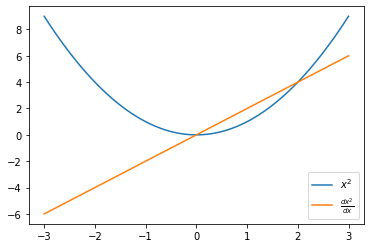

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

x = tf.linspace(-3., 3., 100)

with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = x**2

dy_dx = t.gradient(y, x)

plt.plot(x, y, label="$x^2$")
plt.plot(x, dy_dx, label=r"$\frac{dx^2}{dx}$")
plt.legend();

### Задание 3:

Реализуйте расчёт градиента для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

в точке `w = [[5,10], [1,2]]`

In [58]:
w = tf.constant([[5,10], [1,2]], dtype=tf.float32)

with tf.GradientTape() as t:
    t.watch(w)
    f = tf.reduce_prod(tf.math.log(tf.math.log(w+7)))

df_dw = t.gradient(f,w)

# Ваше решение

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().


In [59]:
df_dw

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.0201272 , 0.01089125],
       [0.04485611, 0.03509369]], dtype=float32)>

# 3. Переменные

Следущий важный объект в tensorflow это **переменная.** Она представляет из себя некоторый буфер в памяти, который содержит текущие тензоры. 

* Переменную можно вставить в любое место графа 
* Переменные можно использовать, чтобы описать какую-то трансформацию
* В процессе расчётов их можно изменять
* Обычно их исползуют для описания параметров модели

In [60]:
w = tf.Variable(initial_value=0.5)
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5>

In [61]:
x = np.array([1,2,3], dtype=float)
x

array([1., 2., 3.])

In [62]:
x*w

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.5, 1. , 1.5], dtype=float32)>

Более того, переменные хороши тем, что Tensorflow сразу же следит за ними при вычислении производных. Ему не надо указывать с помощью команды `watch`, за каким тензором нужно приглядывать. 

### Задание 4:

Реализуйте расчёт градиента для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

в точке `w = [[5,10], [1,2]]`. Отличие от предыдущей задачки такое: надо задать $w$ не как тензор, а как переменную. 

In [63]:
w = tf.Variable(initial_value=[[5.,10], [1,2]])

with tf.GradientTape() as t:
    f = tf.reduce_prod(tf.math.log(tf.math.log(w+7)))
df_dw = t.gradient(f,w)

# Ваше решение

In [64]:
df_dw

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.0201272 , 0.01089125],
       [0.04485611, 0.03509369]], dtype=float32)>

------------------------------------------

# 4. Оптимизация

Итак, tf умеет искать производные, осталось научиться применять его для оптимизации. 

Попробуем решить глупую задачку по конвертации градусов по цельсию в градусы по фаренгейту. По данным будем пытаться восстановить формулу: 

$$ f = c \times 1.8 + 32 $$

In [65]:
celsius    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype='float32')
fahrenheit = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype='float32')

for i,c in enumerate(celsius):
    print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [71]:
# параметры модели 
a = tf.Variable(tf.random.normal([1]), name='bias')
b = tf.Variable(tf.random.normal([1]), name='k')

a.numpy(), b.numpy()

(array([-0.74684435], dtype=float32), array([0.45344216], dtype=float32))

In [67]:
# Наша модель
def linear_regression(x):
    return a + b*x

# Ошибка для модели
def mean_square(y_pred, y_true):
    return tf.reduce_mean((y_pred-y_true)**2)

In [68]:
linear_regression(celsius).numpy()

array([-25.455782 ,  -6.766462 ,  -0.5366884,   4.4471307,   8.807972 ,
        13.168814 ,  23.136452 ], dtype=float32)

In [69]:
mean_square(linear_regression(celsius), fahrenheit).numpy()

2188.0586

In [70]:
# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=0.001)

# процесс оптимизации
def model_train(X, Y):

    # находим loss и пробрасываем градиент
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Вычисляем градиенты
    gradients = g.gradient(loss, [a, b])
    
    # Обновляем веса a и b в ходе одной итерации спуска 
    optimizer.apply_gradients(zip(gradients, [a, b]))
    pass

In [ ]:
a

In [ ]:
model_train(celsius, fahrenheit)

In [ ]:
a

In [72]:
# Обучение
epochs = 2000 # число эпох 

for i in range(epochs):
    
    # Делаем щаг градиентного спуска 
    model_train(celsius, fahrenheit)
    
    # Каждую сотую итерацию следим за тем, что произошло
    if i%100 == 0:
        y_pred = linear_regression(celsius)
        loss_val = mean_square(y_pred, fahrenheit)
        print("step: %i, loss: %f, a: %f, b: %f" % (i, loss_val, a.numpy(), b.numpy()))

step: 0, loss: 1042.935181, a: -0.668769, b: 2.266446
step: 100, loss: 695.853210, a: 5.034729, b: 2.025116
step: 200, loss: 473.772156, a: 9.742136, b: 1.985389
step: 300, loss: 322.574280, a: 13.626310, b: 1.952609
step: 400, loss: 219.635468, a: 16.831221, b: 1.925562
step: 500, loss: 149.552597, a: 19.475653, b: 1.903245
step: 600, loss: 101.838844, a: 21.657614, b: 1.884831
step: 700, loss: 69.354187, a: 23.457998, b: 1.869637
step: 800, loss: 47.237877, a: 24.943535, b: 1.857100
step: 900, loss: 32.180725, a: 26.169270, b: 1.846756
step: 1000, loss: 21.929392, a: 27.180656, b: 1.838220
step: 1100, loss: 14.950075, a: 28.015171, b: 1.831178
step: 1200, loss: 10.198458, a: 28.703741, b: 1.825366
step: 1300, loss: 6.963414, a: 29.271898, b: 1.820572
step: 1400, loss: 4.760969, a: 29.740688, b: 1.816615
step: 1500, loss: 3.261510, a: 30.127491, b: 1.813351
step: 1600, loss: 2.240585, a: 30.446671, b: 1.810657
step: 1700, loss: 1.545552, a: 30.710020, b: 1.808435
step: 1800, loss: 1.0

In [101]:
class simple_model:
    def __init__(self):
        self.w1 = tf.Variable(tf.random.normal([1]), name='w1')
        self.w2 = tf.Variable(tf.random.normal([1]), name='w2')
        self.optimizer = tf.optimizers.SGD(learning_rate=0.001)
        
    def calc_pred(self,x):
        pred = tf.constant(1.,tf.float32)*self.w1+self.w2*x
#         return tf.constant(1.)/(tf.constant(1.)+pred)
        return tf.maximum(0,pred)
    def mean_square(y_pred, y_true):
        return tf.reduce_mean((y_pred-y_true)**2)
    
    def model_train(self,X, Y):

    # находим loss и пробрасываем градиент
        with tf.GradientTape() as g:
            pred = self.calc_pred(X)
            loss = mean_square(pred, Y)

        # Вычисляем градиенты
        gradients = g.gradient(loss, [self.w1, self.w2])

        # Обновляем веса a и b в ходе одной итерации спуска 
        optimizer.apply_gradients(zip(gradients, [self.w1, self.w2]))

    

In [102]:
x = np.array([0.,1.])
y = np.array([1.,0.])


In [104]:
print(f'Текущее состояние параметров w1 = {ss_model.w1.numpy()[0]}, w2 = {ss_model.w2.numpy()[0]}')
ss_model.model_train(x,y)
print(f'Текущее состояние параметров w1 = {ss_model.w1.numpy()[0]}, w2 = {ss_model.w2.numpy()[0]}')

Текущее состояние параметров w1 = 1.96853506565094, w2 = 1.937416911125183
Текущее состояние параметров w1 = 1.9636605978012085, w2 = 1.9335108995437622


In [106]:
%%time
ss_model = simple_model()
for _ in range(100):
    print(f'Текущее состояние параметров w1 = {ss_model.w1.numpy()[0]}, w2 = {ss_model.w2.numpy()[0]}')
    ss_model.model_train(x,y)
    print(f'Текущее состояние параметров w1 = {ss_model.w1.numpy()[0]}, w2 = {ss_model.w2.numpy()[0]}')
    

Текущее состояние параметров w1 = 1.9156609773635864, w2 = 1.8949308395385742
Текущее состояние параметров w1 = 1.9109346866607666, w2 = 1.891120195388794
Текущее состояние параметров w1 = 1.9109346866607666, w2 = 1.891120195388794
Текущее состояние параметров w1 = 1.9062217473983765, w2 = 1.8873181343078613
Текущее состояние параметров w1 = 1.9062217473983765, w2 = 1.8873181343078613
Текущее состояние параметров w1 = 1.9015220403671265, w2 = 1.8835245370864868
Текущее состояние параметров w1 = 1.9015220403671265, w2 = 1.8835245370864868
Текущее состояние параметров w1 = 1.896835446357727, w2 = 1.87973952293396
Текущее состояние параметров w1 = 1.896835446357727, w2 = 1.87973952293396
Текущее состояние параметров w1 = 1.8921620845794678, w2 = 1.8759629726409912
Текущее состояние параметров w1 = 1.8921620845794678, w2 = 1.8759629726409912
Текущее состояние параметров w1 = 1.887501835823059, w2 = 1.8721948862075806
Текущее состояние параметров w1 = 1.887501835823059, w2 = 1.8721948862075

Текущее состояние параметров w1 = 1.6150158643722534, w2 = 1.6476631164550781
Текущее состояние параметров w1 = 1.6150158643722534, w2 = 1.6476631164550781
Текущее состояние параметров w1 = 1.6111382246017456, w2 = 1.6444004774093628
Текущее состояние параметров w1 = 1.6111382246017456, w2 = 1.6444004774093628
Текущее состояние параметров w1 = 1.6072715520858765, w2 = 1.6411449909210205
Текущее состояние параметров w1 = 1.6072715520858765, w2 = 1.6411449909210205
Текущее состояние параметров w1 = 1.603415846824646, w2 = 1.6378965377807617
Текущее состояние параметров w1 = 1.603415846824646, w2 = 1.6378965377807617
Текущее состояние параметров w1 = 1.5995711088180542, w2 = 1.634655237197876
Текущее состояние параметров w1 = 1.5995711088180542, w2 = 1.634655237197876
Текущее состояние параметров w1 = 1.595737338066101, w2 = 1.6314209699630737
Текущее состояние параметров w1 = 1.595737338066101, w2 = 1.6314209699630737
Текущее состояние параметров w1 = 1.591914415359497, w2 = 1.6281938552

In [110]:
class simple_model_opt:
    def __init__(self):
        self.w1 = tf.Variable(tf.random.normal([1]), name='w1')
        self.w2 = tf.Variable(tf.random.normal([1]), name='w2')
        self.optimizer = tf.optimizers.SGD(learning_rate=0.001)
        
    def calc_pred(self,x):
        pred = tf.constant(1.,tf.float32)*self.w1+self.w2*x
#         return tf.constant(1.)/(tf.constant(1.)+pred)
        return tf.maximum(0.,pred)


    def mean_square(y_pred, y_true):
        return tf.reduce_mean((y_pred-y_true)**2)
    @tf.function
    def model_train(self,X, Y):

    # находим loss и пробрасываем градиент
        with tf.GradientTape() as g:
            pred = self.calc_pred(X)
            loss = mean_square(pred, Y)

        # Вычисляем градиенты
        gradients = g.gradient(loss, [self.w1, self.w2])

        # Обновляем веса a и b в ходе одной итерации спуска 
        optimizer.apply_gradients(zip(gradients, [self.w1, self.w2]))

    

In [112]:
%%time
x = np.array([0.,1.],np.float32)
y = np.array([1.,0.],np.float32)

ss_model_2 = simple_model_opt()
for _ in range(100):
    print(f'Текущее состояние параметров w1 = {ss_model_2.w1.numpy()[0]}, w2 = {ss_model_2.w2.numpy()[0]}')
    ss_model_2.model_train(x,y)
    print(f'Текущее состояние параметров w1 = {ss_model_2.w1.numpy()[0]}, w2 = {ss_model_2.w2.numpy()[0]}')

Текущее состояние параметров w1 = 1.1795250177383423, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1793454885482788, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1793454885482788, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1791661977767944, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1791661977767944, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1789870262145996, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1789870262145996, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1788080930709839, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1788080930709839, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1786292791366577, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1786292791366577, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1784507036209106, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1784507036209106, w2 = -1.66

Текущее состояние параметров w1 = 1.166380524635315, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.166214108467102, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.166214108467102, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1660479307174683, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1660479307174683, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.165881872177124, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.165881872177124, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1657159328460693, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1657159328460693, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1655502319335938, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1655502319335938, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1653846502304077, w2 = -1.668702244758606
Текущее состояние параметров w1 = 1.1653846502304077, w2 = -1.6687022

Можно сделать то же самое, но с визуализацией. 

In [73]:
from IPython.display import clear_output

epochs = 2000 # число эпох 

ass = [a.numpy()[0]] # стартовые точки 
bss = [b.numpy()[0]] 

for i in range(epochs):
    # Делаем щаг градиентного спуска 
    model_train(celsius, fahrenheit)
    
    if i%25 == 0:
        # Пополняем запас точек 
        ass.append(a.numpy()[0])
        bss.append(b.numpy()[0])

        clear_output(True) # чтобы всё на одной картинке рисовалось, а не на милионе
        plt.plot(ass, bss, marker='.')
        plt.scatter(32, 1.8, c='red')
        plt.show()
        
        
        
        
        
        

KeyboardInterrupt: 

### Задание 5:

Реализуйте для функции 

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7) 
$$

процедуру градиентного спуска. Каким получилось минимальное значение? 

In [ ]:
# Ваше решение

------------------------------------------

Можно попробовать поразвлекаться с разными методами оптимизации! 

* На вход модели при обучении мы сейчас подавали нумпаевские вектора. В будущем мы будем смотреть и на разные другие способы скармливать модели данные.

# 5. Нейронка на Tensorflow 

Пришло время страдать. Чтобы пострадать как следует, вы получаете задание --- построить свою первую нейросеть в tensorflow. __Спойлер:__ cильнее вего вы будете страдать от того, что размерности матриц не сходятся. Осторожнее с этим. 

Раньше все учили свою первую нейросеть на [наборе рукопистных цифр MNIST.](http://yann.lecun.com/exdb/mnist/) Теперь это не модно. Если где-то кто-то будет проводить у вас семинар с участием этого датасета, так и скажите ему: __это не модно!__  Хлопать дверью или нет --- на ваше усмотрение. 

На арене туториалов новый король: [Fashion MNIST.](https://www.tensorflow.org/tutorials/keras/classification) По ссылке лежит туториал с строительством нейросетки на этом наборе, но с участием Keras. Мы пока что обойдёмся без него.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train.shape, X_test.shape

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Нарисуем несколько рандомных картинок из тренировочной выборки. 

In [ ]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols, 2.5 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(X_train[random_index, :], cmap = 'gray')
        ax.set_xlabel(class_names[y_train[random_index]])
plt.show()

Каждая картинка это матрица из чисел. Если число большое - пиксель яркий. Если маленькое - тёмный. Яркость измеряется по шкале от $0$ до $255$.

In [ ]:
X_train

Картинка - матрица. 

In [ ]:
X_train[0].shape

Давайте отнормируем выборку. 

In [ ]:
X_train = X_train/255
X_test = X_test/255

Будем прогнозировать тип картинки по её пикселям. Давайте растянем её в вектор из $28 \times 28$ фичей.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28**2)
X_test = X_test.reshape(X_test.shape[0], 28**2)
X_train.shape

Поставим для данных тип, чтобы ничего не поломалось.

In [ ]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

У нас в задаче фигурирует $10$ классов. Последним слоем в сетке будет Softmax. Не забудьте сделать OHE, когда будете описывать функцию потерь. 

In [ ]:
tf.keras.utils.to_categorical(y_train)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

## Задание 6

Для начала обучим однослойною модель. Задайте её архитектуру и напишите функцию для прогнозирования. 

In [ ]:
num_classes = 10   # число классов
num_features = 784 # число фичей (28*28 пикселей)

# Задайте переменные W и b :) 

# прогнозы
def logistic_regression(X):
    # ваша модель
    return result

In [ ]:
p_pred = logistic_regression(X_train[:3])
p_pred

Отлично! Теперь давайте реализуем функцию потерь. Использовать будем logloss. Ещё не забыли как его искать? 

In [ ]:
def logloss(p_pred, y_true):
    # Чтобы не возникло log(0) и бесконечностей
    p_pred = tf.clip_by_value(p_pred, 1e-9, 1.)
    # а теперь считаем
    return -tf.reduce_mean(tf.reduce_sum(y_true * tf.math.log(p_pred), axis=1)) 

Чтобы избежать проблем с бесконечностями, обычно logloss считают по-другому, с помощью функции tf.nn.softmax_cross_entropy_with_logits. Откуда берутся проблемы в виде бесконечностей в softmax либо посмотрите во второй лекции, либо в Николенко на страницах  133−135.

In [ ]:
p_pred = logistic_regression(X_train)
logloss(p_pred, y_train)

На каждой итерации будем искать accuracy. Напишите функцию, чтобы его искать. 

In [ ]:
def accuracy(y_pred, y_true):
    # Ваша реализация точности
    return acc

In [ ]:
accuracy(p_pred, y_train)

Задаём оптимизатор

In [ ]:
learning_rate = 1e-4
optimizer = tf.optimizers.Adam(learning_rate)

Задаём один шаг обучения

In [ ]:
def model_train(X, Y):

# Считаем градиенты
    
    # Обновляем веса a и b в ходе одной итерации спуска 
    optimizer.apply_gradients(zip(gradients, [W, b]))
    pass

In [ ]:
W

In [ ]:
# Работает ли?
model_train(X_train, y_train)

In [ ]:
W

Остался только этап для обучения модели. Напишем функцию, которая будет генерировать из наших данных батчи. Одна эпоха - один проход модели по всем батчам. Один батч - совокупность наблюдений.  В этом может помочь [специальный класс для создания батчей, Dataset.](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)

In [ ]:
# создали объект с данными для обучения 
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# перемешали данные с окном в 5000 и сделали кучу батчей размера 512 
train_data = train_data.shuffle(5000).batch(512)

Напишем небольшую функцию для визуализации процедуры обучения. 

In [ ]:
from IPython import display

def visualize(l1,l2, h1, h2):
    plt.figure(figsize=(20,5)) 
    epo_range = range(1,len(h1)+1)
    tick_range = range(1,len(h1)+1,2)
    plt.subplot(1,2,1)
    plt.title('Learning loss')
    plt.plot(epo_range,l1, label='train set')
    plt.plot(epo_range,l2, label='valid set')
    plt.grid()
    plt.xticks(tick_range)
    plt.legend(title = 'Loss at:')
    
    plt.subplot(1,2,2)
    plt.title('Learning accuracy')
    plt.plot(epo_range,h1, label='train set')
    plt.plot(epo_range,h2, label='valid set')
    plt.grid()
    plt.xticks(tick_range)
    plt.ylim(0, 1.)
    plt.legend(title = 'Accuracy at:')
    
    display.clear_output(wait=True)
    plt.show()

Обучаем модель! 

In [ ]:
epochs = 100           # число эпох 
training_steps = 1000  # сколько раз на эпохе теребить генератор батчей

# Вектора для метрик
loss_test, loss_train  = [ ], [ ] 
acc_test, acc_train = [ ], [ ]

for i in range(epochs):
    
    # Проходимся по всем батчам
    for batch_x, batch_y in train_data.take(training_steps):
        
        # Делаем щаг градиентного спуска 
        ### Ваш код для шага на текущем батче

        ########################
    
    # в конце эпохи считаем метрики
    p_train = logistic_regression(X_train)
    p_test = logistic_regression(X_test)
    
    loss_train.append(logloss(p_train, y_train))
    loss_test.append(logloss(p_test, y_test))
    
    acc_train.append(accuracy(p_train, y_train))
    acc_test.append(accuracy(p_test, y_test))
    
    # визуализируем
    visualize(loss_train, loss_test, acc_train, acc_test) 

Делать такие визуализации для больших нейронок и большого количества эпох не лучшая идея, но так как мы только учимся и хотим красивых картинок, то мы можем себе это позволить. __Отдельно обратите внимание,__ что TensorFlow очень чуствительна к размерностям. Например, чтобы работала функция `matmul`, нужно подать ей на вход обязательно матрицы. Даже если это матрица размера $1 \times 1$.

## Задание 7

Переделайте свою логистическую регрессию в двухслойную нейросетку. В качестве функции активации возьмите что угодно. Функцию, где будет реализована модель назовите `our_nn`.

In [ ]:
# Ваш код

Обучаем модель!

In [ ]:
epochs = 100           # число эпох 
training_steps = 1000  # сколько раз на эпохе теребить генератор батчей

# Вектора для метрик
loss_test, loss_train  = [ ], [ ] 
acc_test, acc_train = [ ], [ ]

for i in range(epochs):
    
    # Проходимся по всем батчам
    for batch_x, batch_y in train_data.take(training_steps):
        
        # Делаем щаг градиентного спуска 
        model_train(batch_x, batch_y)
    
    p_train = our_nn(X_train)
    p_test = our_nn(X_test)
    
    loss_train.append(logloss(p_train, y_train))
    loss_test.append(logloss(p_test, y_test))
    
    acc_train.append(accuracy(p_train, y_train))
    acc_test.append(accuracy(p_test, y_test))
    
    # визуализируем
    visualize(loss_train, loss_test, acc_train, acc_test) 

# Вместо итога.

__Но... Но... Но... Намного проще собрать это в Keras! Зачем нам страдать?__

Дело в том, что Keras лишь надстройка над tensorflow. По факту все слои, написанные для Keras - это замаскированный tensorflow. Более того, даже сетку, написанную на Keras можно обучать таким вот незатейливым циклом, как у нас. Иногда так намного проще проверять свои идеи. 

* Например, в прошлый раз мы с вами пытались мень скорость обучения сетки с помощью колбэков прямо в процессе обучения. Это было довольно неприятно и код был неочевидным. Если описывать процедуру обучения в виде цикла, работать становится проще.  В Tensorflow проще делать довольно много разных вещей, а также проще реализовывать и проверять какие-то свои идеи. 
* В том числе на Tensorflow можно писать новые слои для Keras и встраивать их в свои сетки. Этим мы тоже с вами позанимаемся.

# N+1. Как Tensorflow работал раньше 

Больше такой код не надо писать никогда и нигде. Если видите его в туториалах в интернете, сразу закрывайте их. Эти туториалы устарели. Можете попробовать подуть на них (сдуть слой пыли), а дальше попробовать самостоятельно переписать старый код на новый. Это неплохое упражнение :) 

In [ ]:
import tensorflow.compat.v1 as tf  # подгружаем первую версию библиотеки 
tf.disable_v2_behavior()           # отключаем функционал второй 
                                   # теперь код, написанный на версии tf 1.x должен работать 
tf.__version__

Раньше сначала надо было задать структуру вычислений с помощью тензоров. 

In [ ]:
# что происходило в первой версии 
a = tf.constant([1, 2])
b = tf.constant([3, 4])

print(a + b)

Результат на лету было увидеть нельзя. 

In [ ]:
c = a + b
c

Если хотелось результата, надо было запускать вычислительную сессию, которая прогоняла все данные через граф.

In [ ]:
# открываем вычислительную сессию 
with tf.Session() as sess:
    print(sess.run(c))

In [ ]:
# либо можно было открыть глобальную сессию 
sess = tf.InteractiveSession()
c.eval()

In [2]:
190/50493

0.003762897827421623

Процедура обучения модели выглядела раньше иначе. Кроме переменных в обучении участие принимал ещё один объект, `placeholder`. 

* __placeholder__ — место в графе, которое может принимать входные параметры в граф извне. В эти места мы будем вставлять наши данные

In [ ]:
epochs = 10

# плейсхолдеры для данных 
# "Я обещаю вставить сюда x и y позже"
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# параметры модели 
a = tf.Variable(tf.zeros([1]), name='bias')
b = tf.Variable(tf.zeros([1]), name='k')

# модель 
y_hat = b*x + a

# функция потерь и метод оптимизации
loss = tf.sqrt(tf.reduce_sum((y - y_hat)**2))
opt = tf.train.AdamOptimizer(learning_rate = 0.1)

# из-за того, что не было динамических вычислений, 
# было проще с градиентами
step = opt.minimize(loss)

# Но зато было сложнее с процедурой обучения, надо было запускать ... сессии
# открываем вычислительную сессию 
with tf.Session() as sess:
    
    # инициализировали все переменные 
    tf.global_variables_initializer().run() 
    
    for i in range(epochs):
        
        # Дорогая сессия, вычисли мне результат функции потерь, пожалуйста! Вот тебе конкретные x и y! 
        cur_loss = sess.run(loss, feed_dict={x:celsius, y:fahrenheit})
        print('Текущие потери:', cur_loss)
        
        # шаг оптимизации 
        sess.run(step, feed_dict={x:celsius, y:fahrenheit})
        
    print('\nКоэффициенты:', a.eval()[0], b.eval()[0])
    print('Прогнозы:', sess.run(y_hat, feed_dict={x:[-40,0,38]}))

## Почиташки

* [Эффективный tensorflow 2.0](https://www.tensorflow.org/guide/effective_tf2)
* [Простые примеры кода на tensorflow 2.0](https://github.com/aymericdamien/TensorFlow-Examples/tree/master/tensorflow_v2)
* [Очень-очень милая презентация про fashion mnist](https://github.com/fbchow/fashion-mnist-tensorflow/blob/master/ml-fashion-mnist-presentation.pdf)


__Немного старья:__

* [Введение в старую версию Tensorflow на Хабре](https://habrahabr.ru/company/ods/blog/324898/)
* [Введение в старый Tensorflow от ШАД,](https://nbviewer.jupyter.org/github/yandexdataschool/Practical_DL/blob/fall18/week02_autodiff/seminar_tensorflow.ipynb) моя тетрадка частично основана на этой тетрадке, хоть сходство на первый взгляд и не заметно. 
* [Неплохая подборка разных тетрадок](https://github.com/Hvass-Labs/TensorFlow-Tutorials) на старом tensorflow